<a href="https://colab.research.google.com/github/RaoMasood1/heart-disease-prediction_with_preprocessioning/blob/main/heart_disease_prediction_with_preprocessioning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [388]:
# **DATA PROCESSING**

import pandas as pd # Data Processing
import numpy as np # Array Processing
import os # Data Importing

# **DATA ANALYSIS**

import matplotlib.pyplot as plt # Plots
import seaborn as sns # Graphs

# **PRE PROCESSING**

from sklearn.preprocessing import FunctionTransformer  # Transforming of Data
from sklearn.preprocessing import OneHotEncoder # Data Encoding
from sklearn.preprocessing import StandardScaler # Data Scaling
from imblearn.over_sampling import RandomOverSampler # Data OverSampling
from sklearn.decomposition import PCA # Principal Component Analysis

# **MODELS**

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# **NERURAL NETWORKS**

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **METRICS**

from sklearn.metrics import accuracy_score # Model Classification Report


In [389]:
import pandas as pd # Data Processing
import numpy as np
df= pd.read_csv('/content/dataset_heart.csv')

In [390]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [391]:
df.tail()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart_disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2


In [392]:
type(df)

pandas.core.frame.DataFrame

In [393]:
df.sample(3)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart_disease
191,70,1,4,145,174,0,0,125,1,2.6,3,0,7,2
207,58,1,3,105,240,0,2,154,1,0.6,2,0,7,1
62,44,1,3,120,226,0,0,169,0,0.0,1,0,3,1


In [394]:
df.dtypes

age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
heart_disease                             int64
dtype: object

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [396]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart_disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [397]:
df.shape

(270, 14)

In [398]:
df.ndim

2

In [399]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart_disease'],
      dtype='object')

In [400]:
df["heart_disease"].nunique()

2

In [401]:
df.heart_disease.nunique()

2

In [402]:
df.heart_disease.unique()

array([2, 1])

In [403]:
df["heart_disease"].unique()

array([2, 1])

In [404]:
df["sex"].unique()

array([1, 0])

In [405]:
df.head(3)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2


In [406]:
df.heart_disease.value_counts(True)

1    0.555556
2    0.444444
Name: heart_disease, dtype: float64

In [407]:
df["heart_disease"].value_counts()

1    150
2    120
Name: heart_disease, dtype: int64

In [408]:
df["heart_disease"].sample(20)

39     1
52     1
104    2
11     1
37     2
255    1
110    2
260    1
51     1
50     2
64     1
157    1
198    1
220    2
161    2
78     1
173    1
12     1
47     2
73     1
Name: heart_disease, dtype: int64

In [409]:
df.heart_disease.value_counts()

1    150
2    120
Name: heart_disease, dtype: int64

Text(0.5, 1.0, 'Heart Disease Prediction')

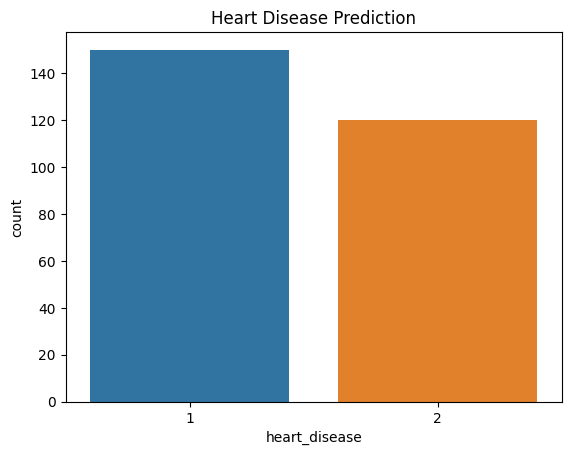

In [410]:
# Show Number of Patient by Stroke
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df , x='heart_disease')
plt.title('Heart Disease Prediction')

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [412]:
df.sample(20)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart_disease
127,52,0,3,136,196,0,2,169,0,0.1,2,0,3,1
95,47,1,4,110,275,0,2,118,1,1.0,2,1,3,2
175,62,0,4,138,294,1,0,106,0,1.9,2,3,3,2
179,50,1,3,129,196,0,0,163,0,0.0,1,0,3,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
216,63,0,3,135,252,0,2,172,0,0.0,1,0,3,1
223,63,1,4,130,330,1,2,132,1,1.8,1,3,7,2
37,59,1,1,160,273,0,2,125,0,0.0,1,0,3,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2
114,42,1,2,120,295,0,0,162,0,0.0,1,0,3,1


In [413]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart_disease'],
      dtype='object')

In [414]:
df["heart_disease"].value_counts()

1    150
2    120
Name: heart_disease, dtype: int64

In [415]:
df.isnull()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart_disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [416]:
df.isnull().any()

age                                     False
sex                                     False
chest pain type                         False
resting blood pressure                  False
serum cholestoral                       False
fasting blood sugar                     False
resting electrocardiographic results    False
max heart rate                          False
exercise induced angina                 False
oldpeak                                 False
ST segment                              False
major vessels                           False
thal                                    False
heart_disease                           False
dtype: bool

In [417]:
df.isnull().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart_disease                           0
dtype: int64

In [418]:
print('Missing data sum :')
print(df.isnull().sum())

print('\nMissing data percentage (%):')
print(df.isnull().sum()/df.count()*100)

Missing data sum :
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart_disease                           0
dtype: int64

Missing data percentage (%):
age                                     0.0
sex                                     0.0
chest pain type                         0.0
resting blood pressure                  0.0
serum cholestoral                       0.0
fasting blood sugar                     0.0
resting electrocardiographic results    0.0
max heart rate                          0.

In [419]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [420]:
cd = pd.DataFrame(cat_features)
cd.head()

""


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [422]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  14
********************************************************************************
Numerical Variables Column:  ['age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral', 'fasting blood sugar', 'resting electrocardiographic results', 'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels', 'thal', 'heart_disease']


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [424]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  14
********************************************************************************
Numerical Variables Column:  ['age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral', 'fasting blood sugar', 'resting electrocardiographic results', 'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels', 'thal', 'heart_disease']


In [425]:
print('*'*10)

**********


In [426]:
numerical_features

['age',
 'sex',
 'chest pain type',
 'resting blood pressure',
 'serum cholestoral',
 'fasting blood sugar',
 'resting electrocardiographic results',
 'max heart rate',
 'exercise induced angina',
 'oldpeak',
 'ST segment',
 'major vessels',
 'thal',
 'heart_disease']

In [427]:
cat_features

[]

In [428]:
df.sex.duplicated()

0      False
1      False
2       True
3       True
4       True
       ...  
265     True
266     True
267     True
268     True
269     True
Name: sex, Length: 270, dtype: bool

In [429]:
df.duplicated().sum()

0

In [430]:
df['sex'].unique()

array([1, 0])

In [431]:
df['sex'].nunique()

2

In [432]:
df['age'].unique()

array([70, 67, 57, 64, 74, 65, 56, 59, 60, 63, 53, 44, 61, 71, 46, 40, 48,
       43, 47, 54, 51, 58, 66, 37, 50, 42, 62, 49, 52, 45, 41, 76, 39, 35,
       55, 34, 38, 69, 68, 77, 29])

In [433]:
df['age'].nunique()

41

In [434]:
df['age'].sample(10)

61     51
245    60
3      64
201    58
143    51
258    64
257    55
203    51
165    64
44     59
Name: age, dtype: int64

In [435]:
df['chest pain type'].unique()

array([4, 3, 2, 1])

In [436]:
df['age'].nunique()

41

In [437]:
df['resting blood pressure'].unique()

array([130, 115, 124, 128, 120, 110, 140, 150, 135, 142, 134, 112, 132,
       138, 160, 170, 144, 122, 152, 101, 126, 118, 136, 105, 174, 145,
       108, 156, 106, 104,  94, 146, 148, 178, 125, 100, 165, 180, 158,
       200, 117, 192, 123, 129, 102, 155, 172])

In [438]:
df['resting blood pressure'].nunique()

47

In [439]:
df['serum cholestoral'].unique()

array([322, 564, 261, 263, 269, 177, 256, 239, 293, 407, 234, 226, 235,
       303, 149, 311, 203, 211, 199, 229, 245, 204, 288, 275, 243, 295,
       230, 265, 228, 215, 326, 200, 207, 273, 180, 222, 223, 209, 233,
       197, 218, 246, 225, 315, 205, 417, 195, 198, 166, 178, 249, 281,
       126, 305, 240, 276, 319, 242, 260, 354, 309, 208, 236, 270, 214,
       201, 244, 306, 221, 330, 266, 206, 212, 302, 313, 141, 237, 289,
       254, 274, 258, 160, 327, 304, 271, 283, 188, 286, 360, 267, 196,
       232, 277, 210, 213, 282, 167, 224, 268, 250, 219, 217, 308, 193,
       231, 262, 259, 325, 299, 182, 294, 298, 409, 172, 184, 394, 174,
       255, 248, 300, 318, 216, 252, 227, 220, 168, 183, 341, 186, 307,
       164, 257, 321, 264, 253, 185, 290, 175, 353, 335, 247, 340, 284,
       192])

In [440]:
df['serum cholestoral'].nunique()

144

In [441]:
df['fasting blood sugar'].unique()

array([0, 1])

In [442]:
df['fasting blood sugar'].nunique()

2

In [443]:
df['resting electrocardiographic results'].unique()

array([2, 0, 1])

In [444]:
df['resting electrocardiographic results'].nunique()

3

In [445]:
df['max heart rate'].unique()

array([109, 160, 141, 105, 121, 140, 142, 170, 154, 161, 111, 180, 145,
       159, 125, 120, 155, 144, 178, 129, 181, 143, 139, 152, 157, 165,
       130, 150, 138, 126, 186, 163, 179, 156, 134, 177, 114, 184, 175,
       168,  96, 103, 173, 169, 171, 112, 149, 116, 147, 148, 128, 164,
       108, 118, 151, 133, 162,  71, 124, 166, 117, 153,  88,  99, 158,
       132, 172, 192, 182, 195,  95, 167, 122, 174, 131, 146, 115, 106,
       194, 187, 202, 127,  97, 136, 190, 185, 113, 188, 123, 137])

In [446]:
df['max heart rate'].nunique()

90

In [447]:
df['exercise induced angina'].unique()

array([0, 1])

In [448]:
df['exercise induced angina'].nunique()

2

In [449]:
df['oldpeak'].unique()

array([2.4, 1.6, 0.3, 0.2, 0.4, 0.6, 1.2, 4. , 0.5, 0. , 2.6, 1.8, 3.1,
       1.4, 0.1, 2.5, 2.3, 3.4, 0.9, 1.9, 2.2, 0.8, 1. , 3.6, 1.1, 3. ,
       2. , 1.5, 4.2, 3.2, 0.7, 5.6, 3.8, 2.1, 2.9, 2.8, 3.5, 6.2, 1.3])

In [450]:
df['oldpeak'].nunique()

39

In [451]:
df['ST segment'].unique()

array([2, 1, 3])

In [452]:
df['ST segment'].nunique()

3

In [453]:
df['major vessels'].unique()

array([3, 0, 1, 2])

In [454]:
df['major vessels'].nunique()

4

In [455]:
df['thal'].unique()

array([3, 7, 6])

In [456]:
df['thal'].nunique()

3

[Text(0.5, 1.0, 'Correlation Matrix')]

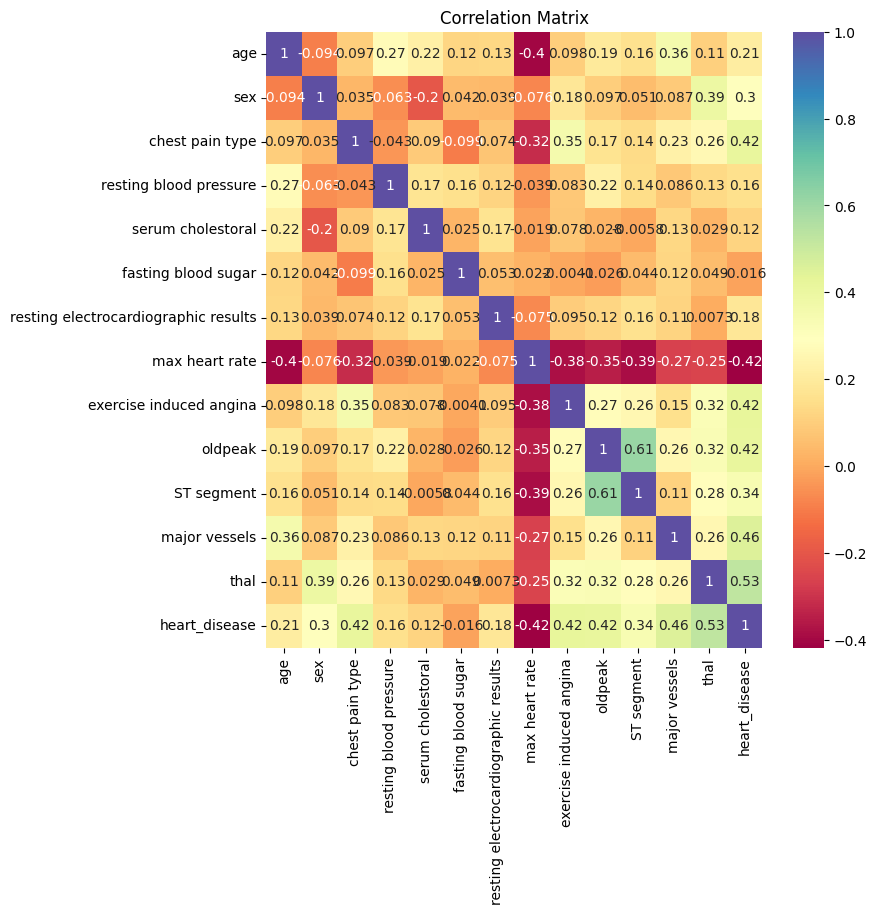

In [457]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

<Axes: >

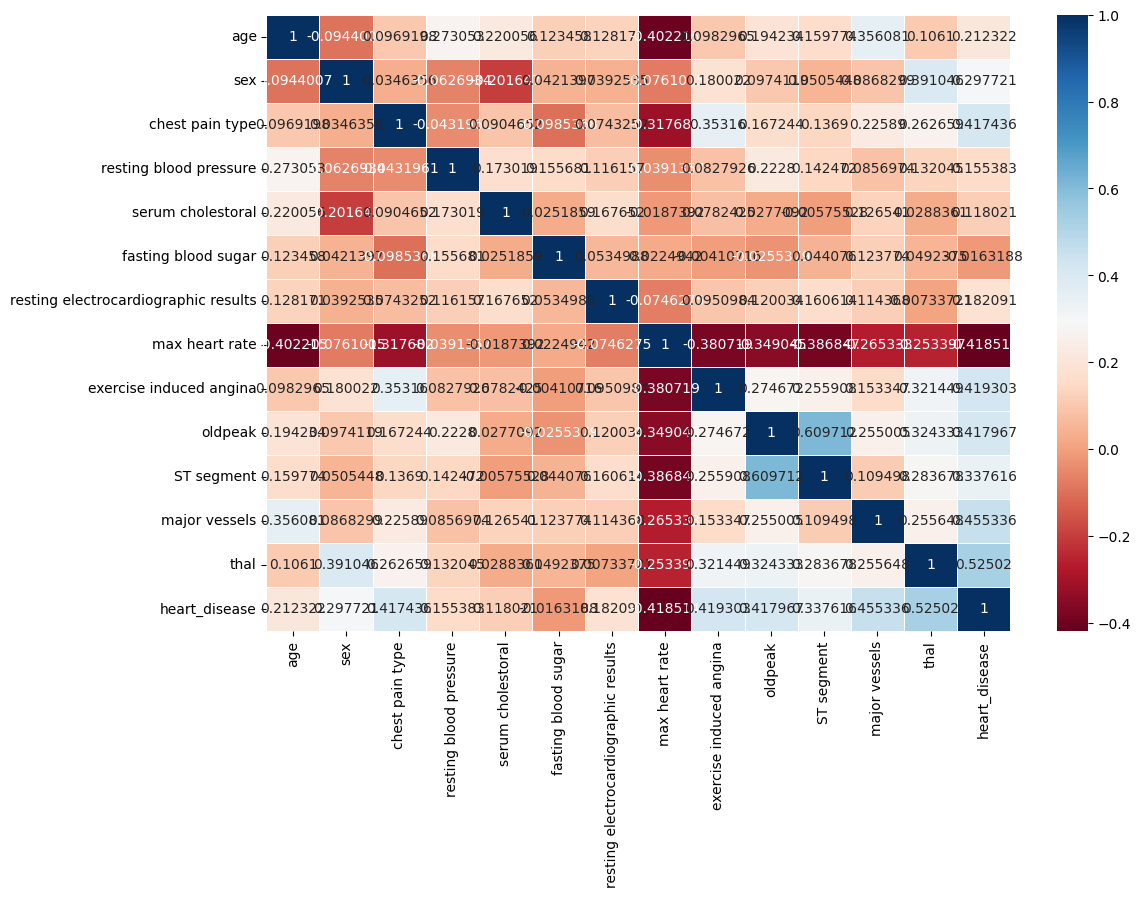

In [458]:
fig = plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

In [459]:
corr_matrix = df.corr().round(2)
corr_matrix

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart_disease
age,1.00,-0.09,0.10,0.27,0.22,0.12,0.13,-0.40,0.10,0.19,0.16,0.36,0.11,0.21
sex,-0.09,1.00,0.03,-0.06,-0.20,0.04,0.04,-0.08,0.18,0.10,0.05,0.09,0.39,0.30
chest pain type,0.10,0.03,1.00,-0.04,0.09,-0.10,0.07,-0.32,0.35,0.17,0.14,0.23,0.26,0.42
resting blood pressure,0.27,-0.06,-0.04,1.00,0.17,0.16,0.12,-0.04,0.08,0.22,0.14,0.09,0.13,0.16
serum cholestoral,0.22,-0.20,0.09,0.17,1.00,0.03,0.17,-0.02,0.08,0.03,-0.01,0.13,0.03,0.12
fasting blood sugar,0.12,0.04,-0.10,0.16,0.03,1.00,0.05,0.02,-0.00,-0.03,0.04,0.12,0.05,-0.02
resting electrocardiographic results,0.13,0.04,0.07,0.12,0.17,0.05,1.00,-0.07,0.10,0.12,0.16,0.11,0.01,0.18
max heart rate,-0.40,-0.08,-0.32,-0.04,-0.02,0.02,-0.07,1.00,-0.38,-0.35,-0.39,-0.27,-0.25,-0.42
exercise induced angina,0.10,0.18,0.35,0.08,0.08,-0.00,0.10,-0.38,1.00,0.27,0.26,0.15,0.32,0.42
oldpeak,0.19,0.10,0.17,0.22,0.03,-0.03,0.12,-0.35,0.27,1.00,0.61,0.26,0.32,0.42


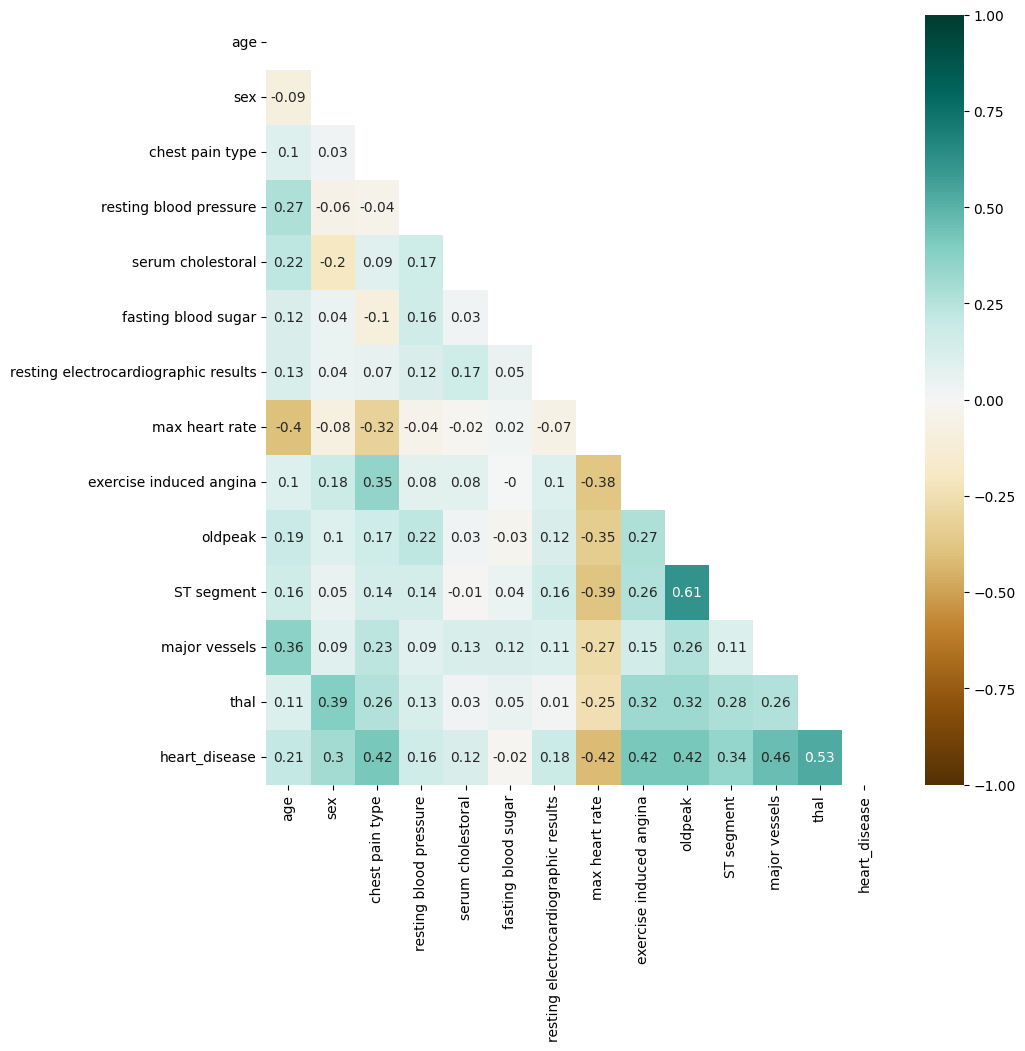

In [460]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [461]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [462]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  14
********************************************************************************
Numerical Variables Column:  ['age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral', 'fasting blood sugar', 'resting electrocardiographic results', 'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels', 'thal', 'heart_disease']


In [463]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='heart_disease',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

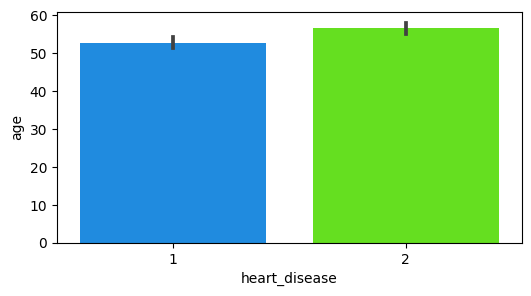

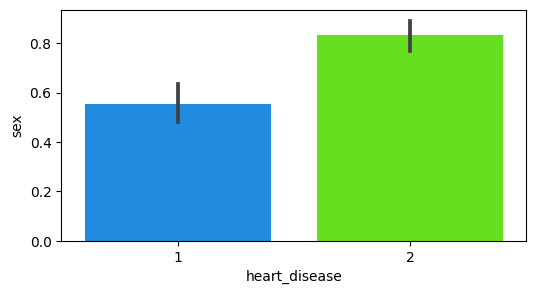

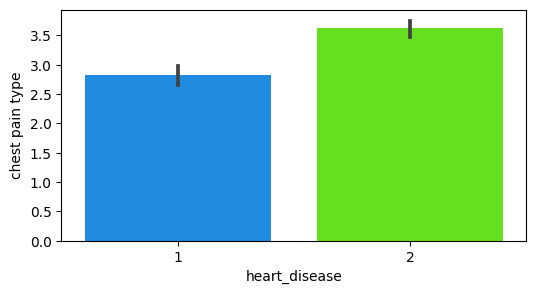

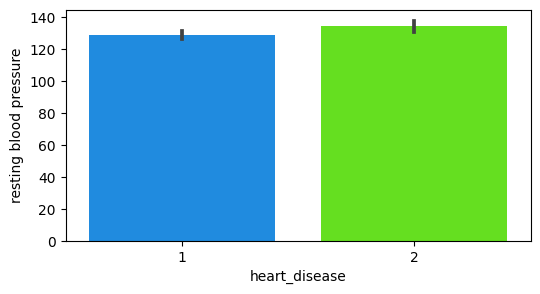

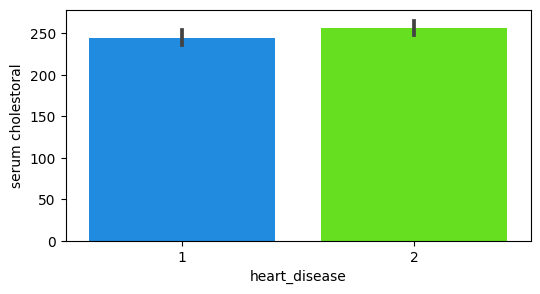

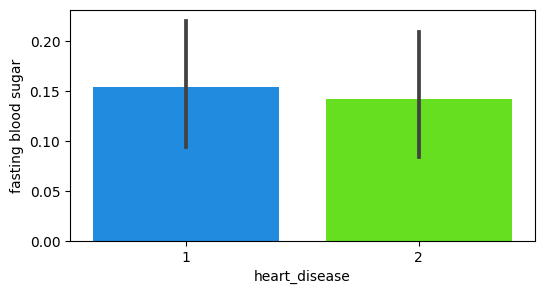

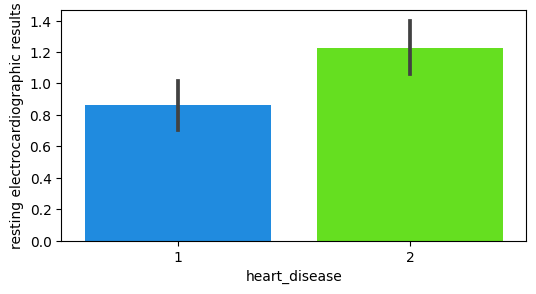

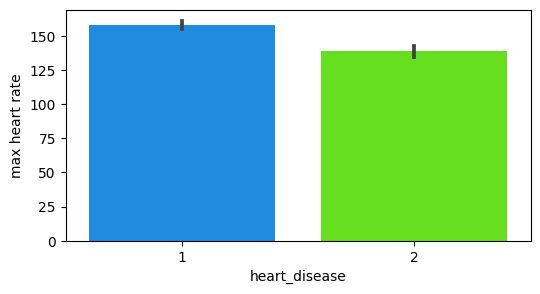

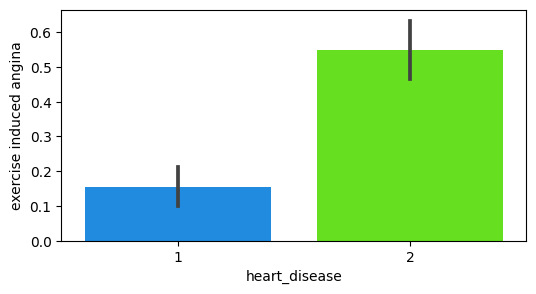

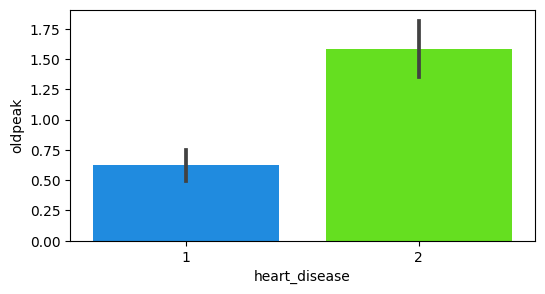

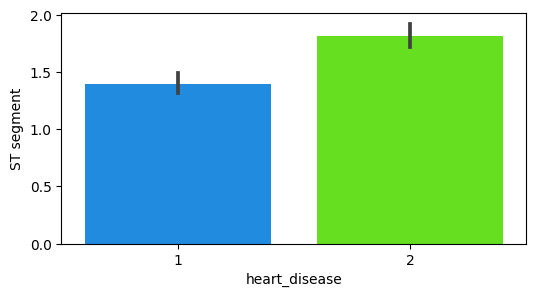

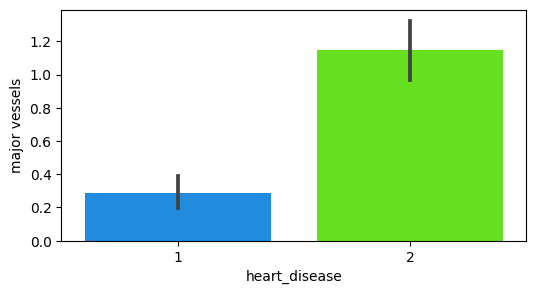

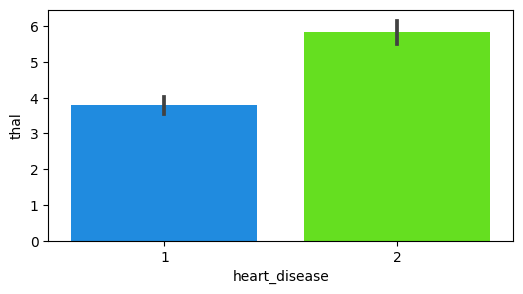

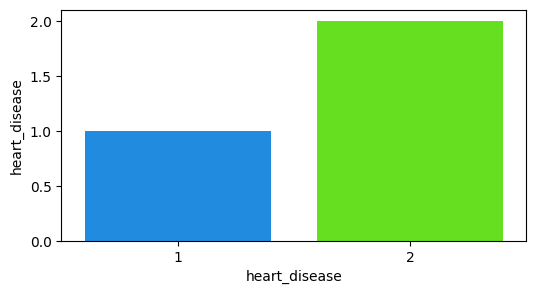

In [464]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='heart_disease',y=col,palette='gist_rainbow_r')

In [465]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [466]:
df.isnull().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart_disease                           0
dtype: int64

In [467]:
df["serum cholestoral"]=df["serum cholestoral"].fillna(df["serum cholestoral"].mean())

In [468]:
df.isnull().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart_disease                           0
dtype: int64

In [469]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart_disease'],
      dtype='object')

In [470]:
df.shape

(270, 14)

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [472]:
train_data_cat = df.select_dtypes("object")
train_data_num = df.select_dtypes("number")

In [473]:
train_data_cat.head(3)

""
0
1
2


In [474]:
train_data_num.head(3)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2


In [475]:
print(train_data_cat)
print(train_data_cat.shape)


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[270 rows x 0 columns]
(270, 0)


In [476]:
import pandas as pd

# Assuming you have loaded train_data_cat properly
# Check if the DataFrame is empty
if train_data_cat.empty:
    print("train_data_cat is empty.")
else:
    try:
        # Attempt to encode the categorical columns
        train_data_cata_encoded = pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
        train_data_cata_encoded.head()
    except Exception as e:
        print("An error occurred:", e)

train_data_cat is empty.


In [477]:
y = df['heart_disease']
x = df.drop('heart_disease', axis = 1)

In [478]:
print(x.shape)
print(y.shape)

(270, 13)
(270,)


In [479]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [480]:
x

array([[ 1.71209356,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581],
       [ 1.38213977, -1.45032695, -0.18355874, ...,  0.67641928,
        -0.71153494,  1.18927733],
       [ 0.2822938 ,  0.6894997 , -1.23804513, ..., -0.95423434,
        -0.71153494,  1.18927733],
       ...,
       [ 0.1723092 , -1.45032695, -1.23804513, ...,  0.67641928,
        -0.71153494, -0.87570581],
       [ 0.2822938 ,  0.6894997 ,  0.87092765, ...,  0.67641928,
        -0.71153494,  0.67303154],
       [ 1.38213977,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581]])

In [481]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [482]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((189, 13), (81, 13))

In [483]:
accuracy = {}

0.8271604938271605
              precision    recall  f1-score   support

           1       0.87      0.83      0.85        47
           2       0.78      0.82      0.80        34

    accuracy                           0.83        81
   macro avg       0.82      0.83      0.82        81
weighted avg       0.83      0.83      0.83        81



,Actual,Y test predicted
199,2,2
256,1,1
3,1,2
154,1,1
115,1,1
257,2,2
241,1,1
128,1,1
81,2,2
104,2,2


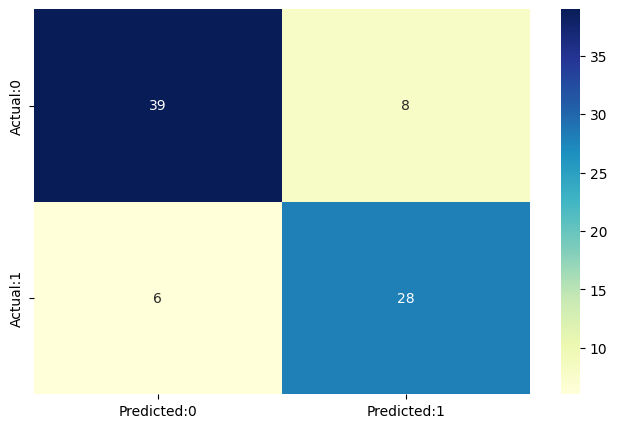

In [484]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_logistic= LogisticRegression(max_iter=200)
model_logistic.fit(X_train,y_train)

y_pred_logis = model_logistic.predict(X_test)
print(accuracy_score(y_test, y_pred_logis))
logistic_acc = accuracy_score(y_test, y_pred_logis)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_logis)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_logis))

y_pred_test = model_logistic.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=200, max_iter=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Info] Number of positive: 86, number of negative: 103
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 217
[LightGBM] [Info] Number of data points in the train set: 189, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455026 -> initscore=-0.180382
[LightGBM] [Info] Start training from score -0.180382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

,Actual,Y test predicted
74,1,1
101,2,1
62,1,1
162,1,1
247,1,1
248,2,1
132,1,1
210,2,2
84,1,2
153,1,2


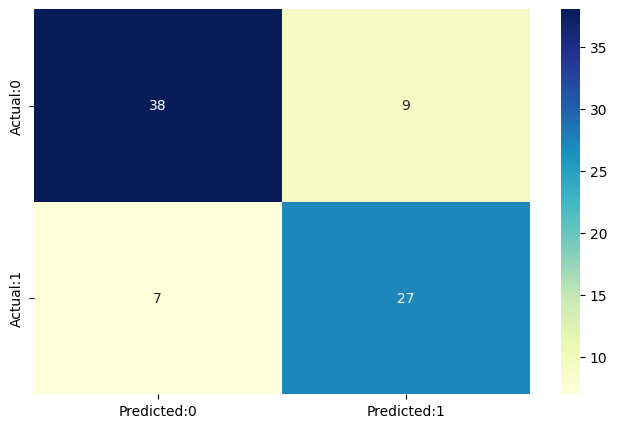

In [485]:
#LightGBM
import lightgbm as lgb
model_gbm= lgb.LGBMClassifier(max_iter=200)
model_gbm.fit(X_train,y_train)

y_pred_gbm = model_gbm.predict(X_test)
print(accuracy_score(y_test, y_pred_gbm))
gbm_accu = accuracy_score(y_test, y_pred_gbm)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_gbm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_gbm))

y_pred_test = model_gbm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.8148148148148148
              precision    recall  f1-score   support

           1       0.85      0.83      0.84        47
           2       0.77      0.79      0.78        34

    accuracy                           0.81        81
   macro avg       0.81      0.81      0.81        81
weighted avg       0.82      0.81      0.82        81



,Actual,Y test predicted
86,1,1
162,1,1
129,2,2
114,1,1
11,1,2
132,1,1
154,1,1
139,1,2
88,1,1
237,2,2


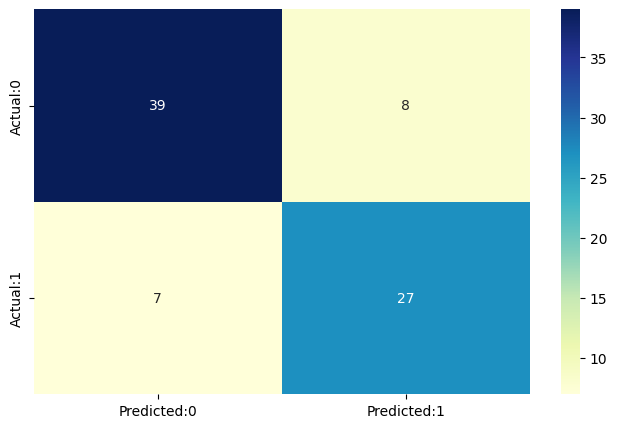

In [486]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model_gbc= GradientBoostingClassifier()
model_gbc.fit(X_train,y_train)

y_pred_gbc = model_gbc.predict(X_test)
print(accuracy_score(y_test, y_pred_gbc))
gbc_accu = accuracy_score(y_test, y_pred_gbc)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_gbc)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_gbc))

y_pred_test = model_gbc.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.8148148148148148
              precision    recall  f1-score   support

           1       0.83      0.85      0.84        47
           2       0.79      0.76      0.78        34

    accuracy                           0.81        81
   macro avg       0.81      0.81      0.81        81
weighted avg       0.81      0.81      0.81        81



,Actual,Y test predicted
70,2,2
162,1,1
60,1,1
224,1,1
213,2,2
22,1,1
264,2,1
235,2,2
78,1,1
126,2,2


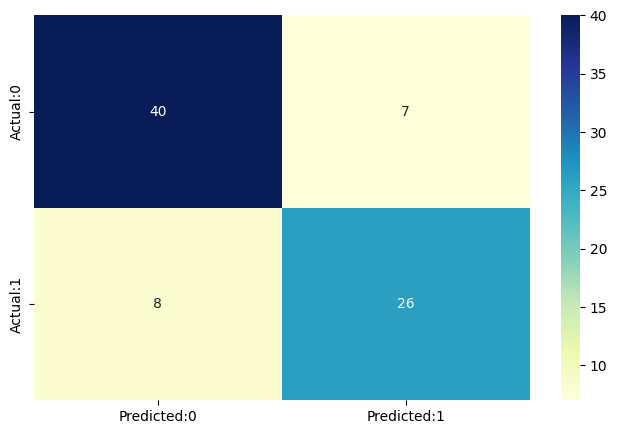

In [487]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_Random= RandomForestClassifier()
model_Random.fit(X_train,y_train)

y_pred_Random= model_Random.predict(X_test)
print(accuracy_score(y_test, y_pred_Random))
rf_accu = accuracy_score(y_test, y_pred_Random)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_Random)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_Random))

y_pred_test = model_Random.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7283950617283951
              precision    recall  f1-score   support

           1       0.77      0.77      0.77        47
           2       0.68      0.68      0.68        34

    accuracy                           0.73        81
   macro avg       0.72      0.72      0.72        81
weighted avg       0.73      0.73      0.73        81



,Actual,Y test predicted
190,1,1
98,1,1
122,2,2
162,1,1
115,1,1
81,2,2
199,2,1
111,1,1
264,2,1
214,1,1


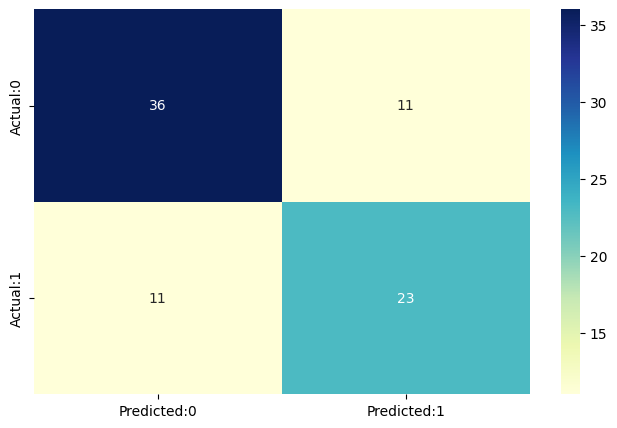

In [488]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_tree= DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

y_pred_tree= model_tree.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))
tree_accu = accuracy_score(y_test, y_pred_tree)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_tree)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_tree))

y_pred_test = model_tree.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.8271604938271605
              precision    recall  f1-score   support

           1       0.87      0.83      0.85        47
           2       0.78      0.82      0.80        34

    accuracy                           0.83        81
   macro avg       0.82      0.83      0.82        81
weighted avg       0.83      0.83      0.83        81



,Actual,Y test predicted
180,1,1
24,1,1
114,1,1
231,2,1
190,1,1
216,1,1
164,1,2
241,1,1
46,2,2
150,1,1


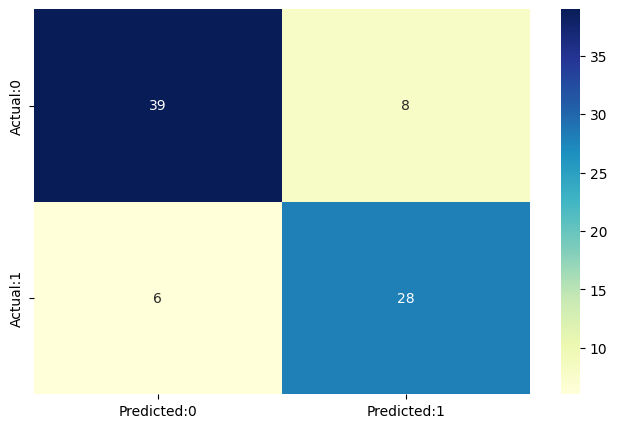

In [489]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier()
model_knn.fit(X_train,y_train)

y_pred_knn= model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))
knn_accu = accuracy_score(y_test, y_pred_knn)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_knn)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_knn))

y_pred_test = model_knn.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.8271604938271605
              precision    recall  f1-score   support

           1       0.88      0.81      0.84        47
           2       0.76      0.85      0.81        34

    accuracy                           0.83        81
   macro avg       0.82      0.83      0.82        81
weighted avg       0.83      0.83      0.83        81



,Actual,Y test predicted
154,1,1
248,2,1
264,2,1
94,2,2
197,1,1
129,2,2
114,1,1
161,2,2
210,2,1
133,2,2


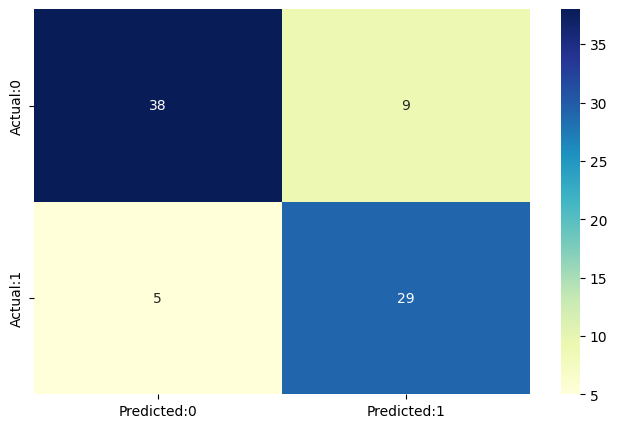

In [490]:
#SVM
from sklearn.svm import SVC
model_svm= SVC()
model_svm.fit(X_train,y_train)

y_pred_svm= model_svm.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))
svm_accu = accuracy_score(y_test, y_pred_svm)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_svm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_svm))

y_pred_test = model_svm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

In [491]:
accuracy


{}

Text(0, 0.5, 'Accuracy')

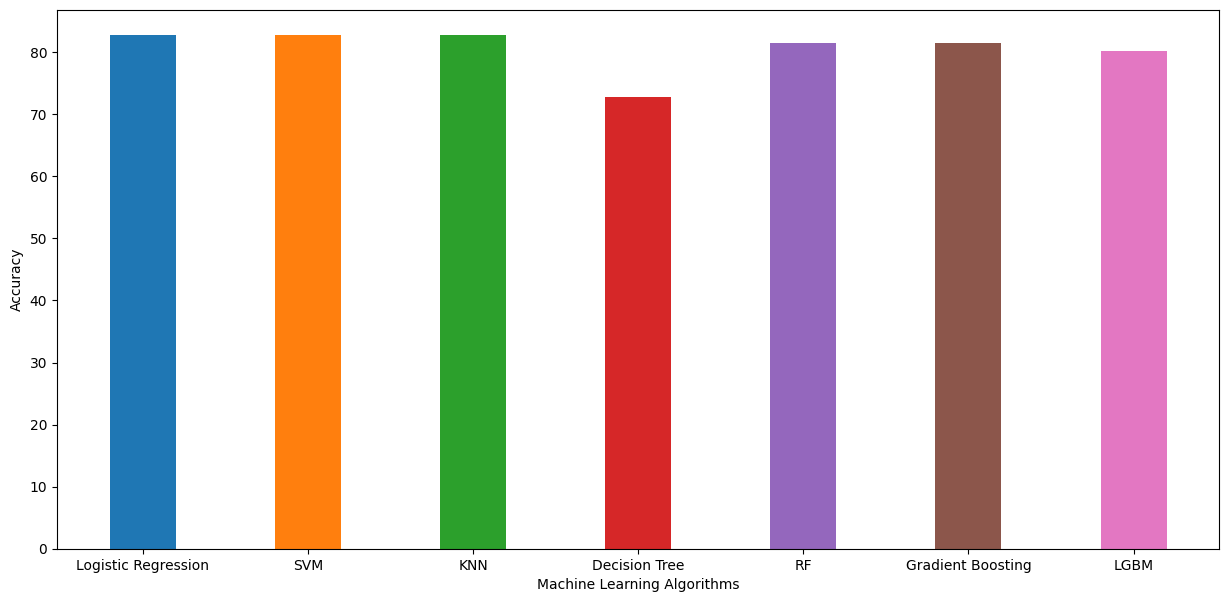

In [492]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logistic_acc, width=0.4)
plt.bar("SVM", svm_accu, width=0.4)
plt.bar("KNN",knn_accu,width=0.4)
plt.bar("Decision Tree", tree_accu,width=0.4)
plt.bar("RF", rf_accu,width=0.4)
plt.bar("Gradient Boosting", gbc_accu,width=0.4)
plt.bar("LGBM",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy')

#**Using SMOTE**

In [493]:
from imblearn.over_sampling import SMOTE


In [494]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x1, y1 = smote.fit_resample(x, y)

print(y1.value_counts())


2    150
1    150
Name: heart_disease, dtype: int64


In [495]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3 ,shuffle = 'True',random_state = 3)

In [496]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 13)
(90, 13)
(210,)
(90,)


0.8333333333333334
              precision    recall  f1-score   support

           1       0.85      0.84      0.85        49
           2       0.81      0.83      0.82        41

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



,Actual,Y test predicted
84,1,2
217,1,2
211,1,1
286,2,2
31,1,2


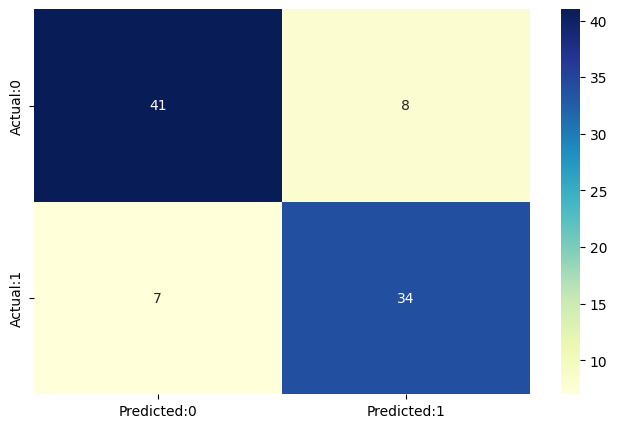

In [497]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
logis_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.8111111111111111
              precision    recall  f1-score   support

           1       0.83      0.82      0.82        49
           2       0.79      0.80      0.80        41

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



,Actual,Y test predicted
84,1,2
217,1,2
211,1,1
286,2,2
31,1,2


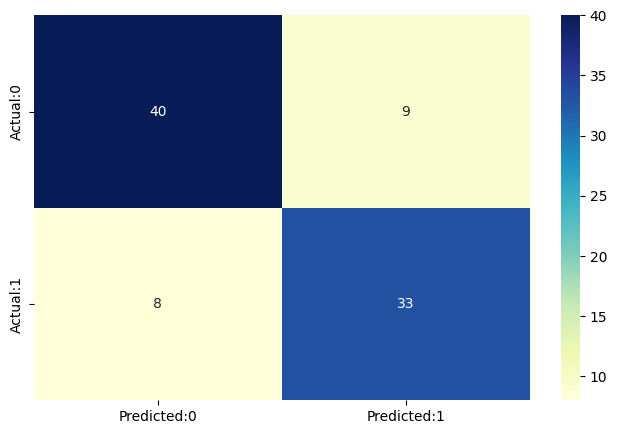

In [498]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred1 = svm.predict(X_test)
print(accuracy_score(y_test, y_pred1))
svm_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = svm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.8
              precision    recall  f1-score   support

           1       0.83      0.80      0.81        49
           2       0.77      0.80      0.79        41

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



,Actual,Y test predicted
84,1,2
217,1,2
211,1,2
286,2,2
31,1,2


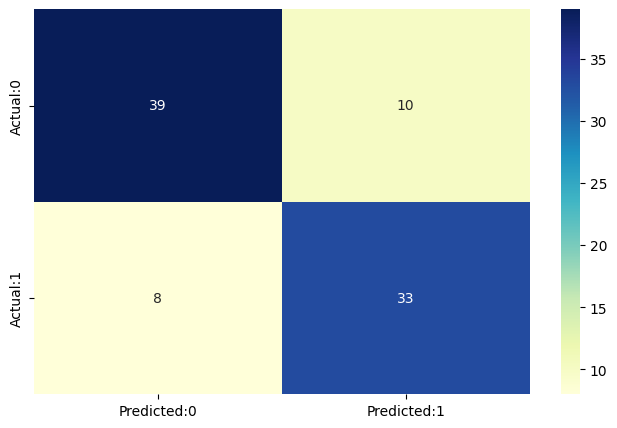

In [499]:
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred1))
knn_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = knn.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.7666666666666667
              precision    recall  f1-score   support

           1       0.85      0.69      0.76        49
           2       0.70      0.85      0.77        41

    accuracy                           0.77        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.78      0.77      0.77        90



,Actual,Y test predicted
84,1,2
217,1,2
211,1,1
286,2,2
31,1,2


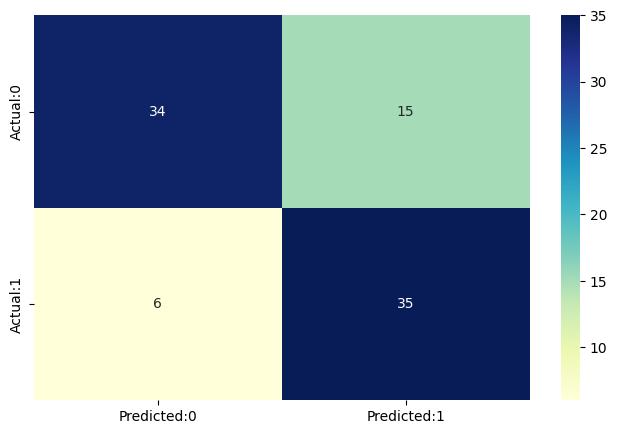

In [500]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)
print(accuracy_score(y_test, y_pred1))
dt_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = dt.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.7777777777777778
              precision    recall  f1-score   support

           1       0.84      0.73      0.78        49
           2       0.72      0.83      0.77        41

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.79      0.78      0.78        90



,Actual,Y test predicted
84,1,2
217,1,2
211,1,2
286,2,2
31,1,2


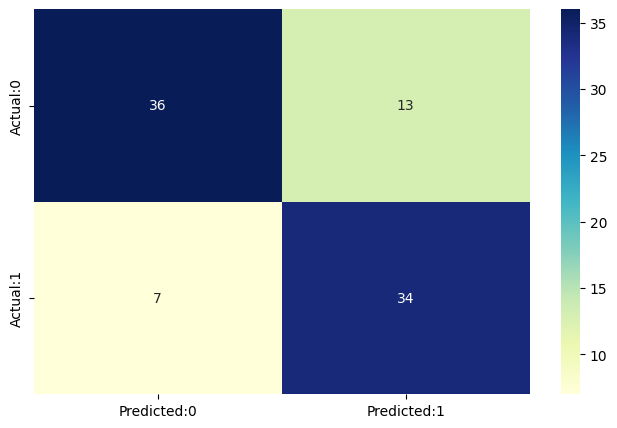

In [501]:
rf= DecisionTreeClassifier()
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
print(accuracy_score(y_test, y_pred1))
rf_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = rf.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.7888888888888889
              precision    recall  f1-score   support

           1       0.80      0.82      0.81        49
           2       0.78      0.76      0.77        41

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



,Actual,Y test predicted
84,1,2
217,1,1
211,1,2
286,2,2
31,1,2


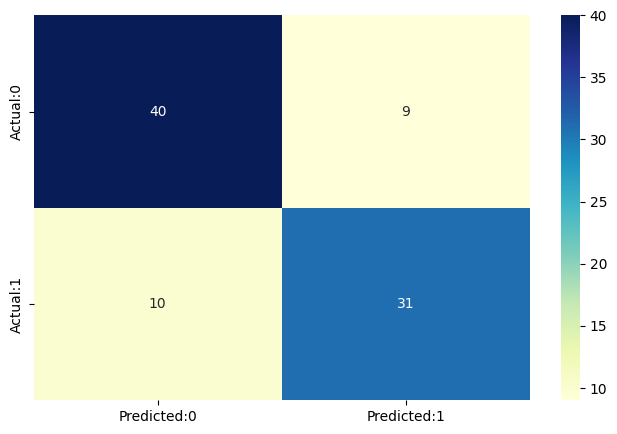

In [502]:
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred1 = gb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
gb_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = gb.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

[LightGBM] [Info] Number of positive: 109, number of negative: 101
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 210, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.519048 -> initscore=0.076227
[LightGBM] [Info] Start training from score 0.076227
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

,Actual,Y test predicted
84,1,2
217,1,1
211,1,1
286,2,2
31,1,2


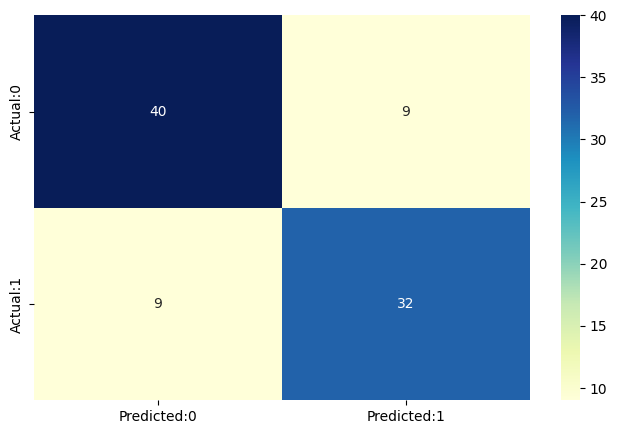

In [503]:
lgbm= lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred1 = lgbm.predict(X_test)
print(accuracy_score(y_test, y_pred1))
lgbm_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = lgbm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

Text(0, 0.5, 'Accuracy')

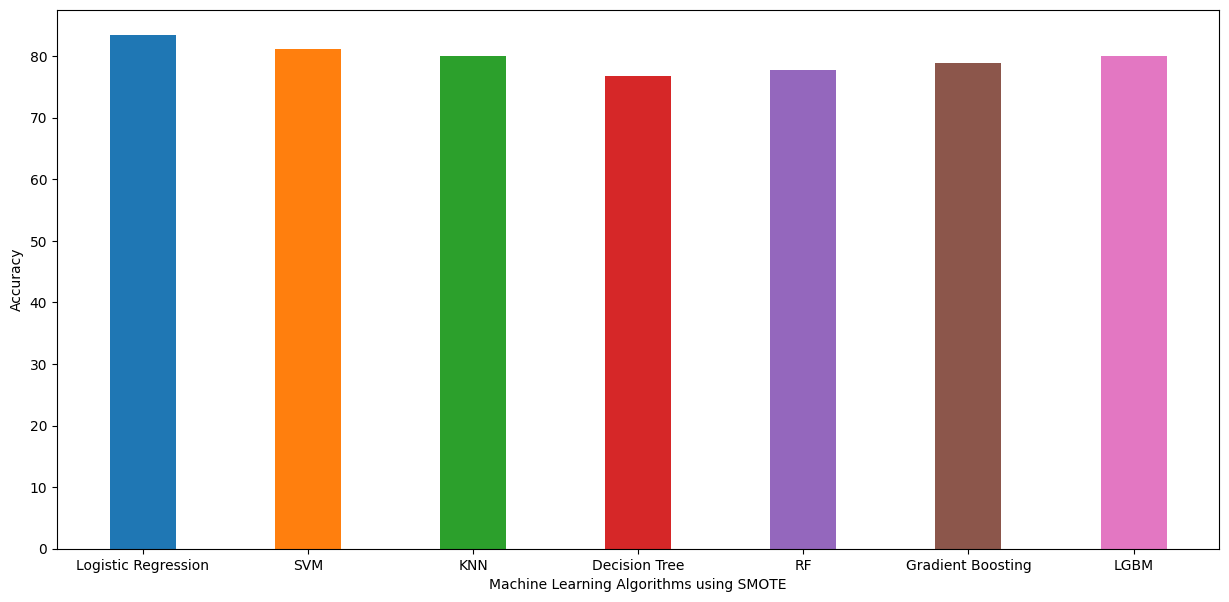

In [504]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logis_acc1 , width=0.4)
plt.bar("SVM", svm_acc1, width=0.4)
plt.bar("KNN",knn_acc1,width=0.4)
plt.bar("Decision Tree", dt_acc1 ,width=0.4)
plt.bar("RF", rf_acc1,width=0.4)
plt.bar("Gradient Boosting", gb_acc1,width=0.4)
plt.bar("LGBM",lgbm_acc1,width=0.4)
plt.xlabel('Machine Learning Algorithms using SMOTE')
plt.ylabel('Accuracy')

In [505]:
print("Logistic Regression", logistic_acc)
print("Logistic Regression with S", logis_acc1 )
print("SVM", svm_accu)
print("SVM with S", svm_acc1)
print("KNN",knn_accu)
print("KNN with S",knn_acc1)
print("Decision Tree", tree_accu)
print("Decision Tree with S", dt_acc1 )
print("Random Forest", rf_accu)
print("Random Forest with S", rf_acc1)
print("Gradient Boosting", gbc_accu)
print("Gradient Boosting with S", gb_acc1)
print("LGBM",gbm_accu)
print("LGBM with S",lgbm_acc1)

Logistic Regression 82.71604938271605
Logistic Regression with S 83.33333333333334
SVM 82.71604938271605
SVM with S 81.11111111111111
KNN 82.71604938271605
KNN with S 80.0
Decision Tree 72.8395061728395
Decision Tree with S 76.66666666666667
Random Forest 81.48148148148148
Random Forest with S 77.77777777777779
Gradient Boosting 81.48148148148148
Gradient Boosting with S 78.88888888888889
LGBM 80.24691358024691
LGBM with S 80.0


Text(0, 0.5, 'Accuracy')

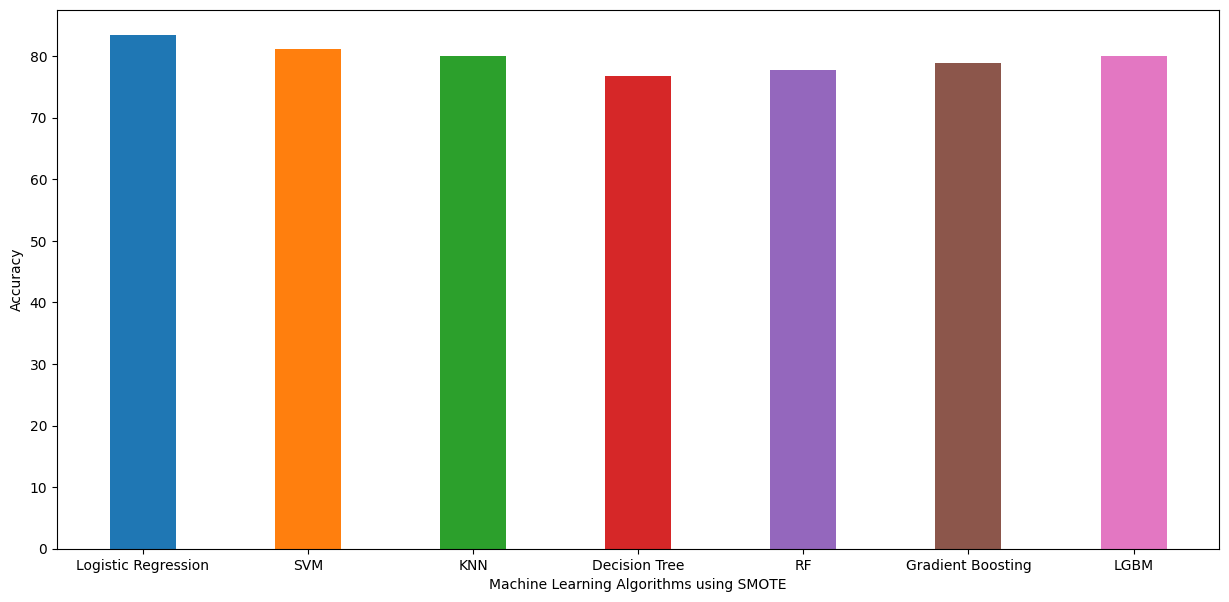

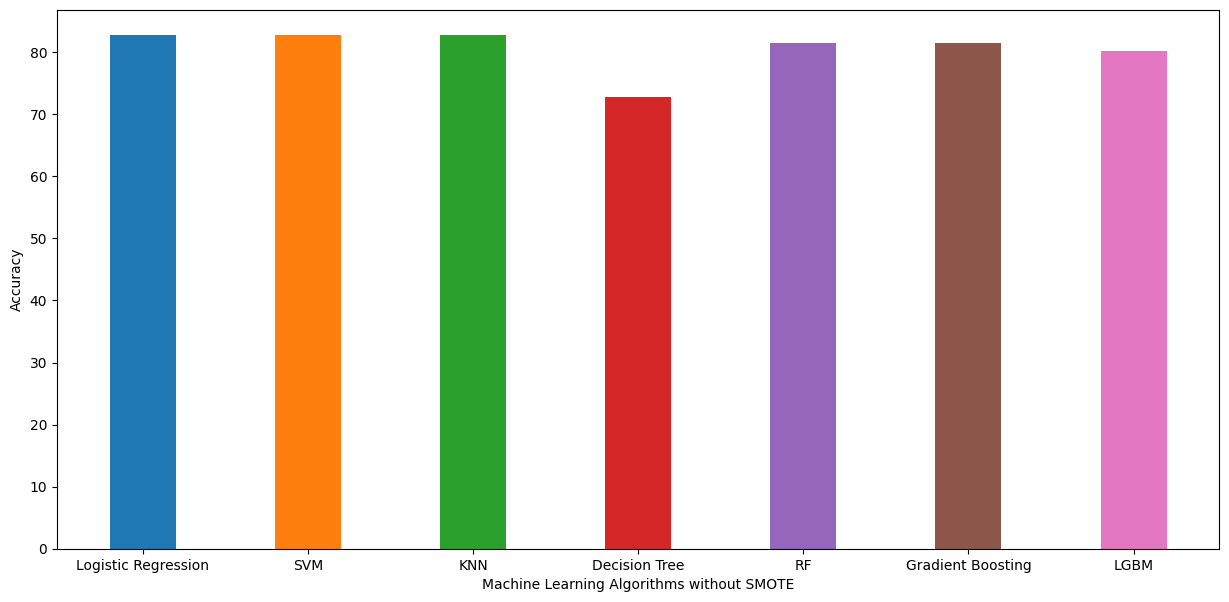

In [506]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logis_acc1 , width=0.4)
plt.bar("SVM", svm_acc1, width=0.4)
plt.bar("KNN",knn_acc1,width=0.4)
plt.bar("Decision Tree", dt_acc1 ,width=0.4)
plt.bar("RF", rf_acc1,width=0.4)
plt.bar("Gradient Boosting", gb_acc1,width=0.4)
plt.bar("LGBM",lgbm_acc1,width=0.4)
plt.xlabel('Machine Learning Algorithms using SMOTE')
plt.ylabel('Accuracy')


plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logistic_acc, width=0.4)
plt.bar("SVM", svm_accu, width=0.4)
plt.bar("KNN",knn_accu,width=0.4)
plt.bar("Decision Tree", tree_accu,width=0.4)
plt.bar("RF", rf_accu,width=0.4)
plt.bar("Gradient Boosting", gbc_accu,width=0.4)
plt.bar("LGBM",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms without SMOTE')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

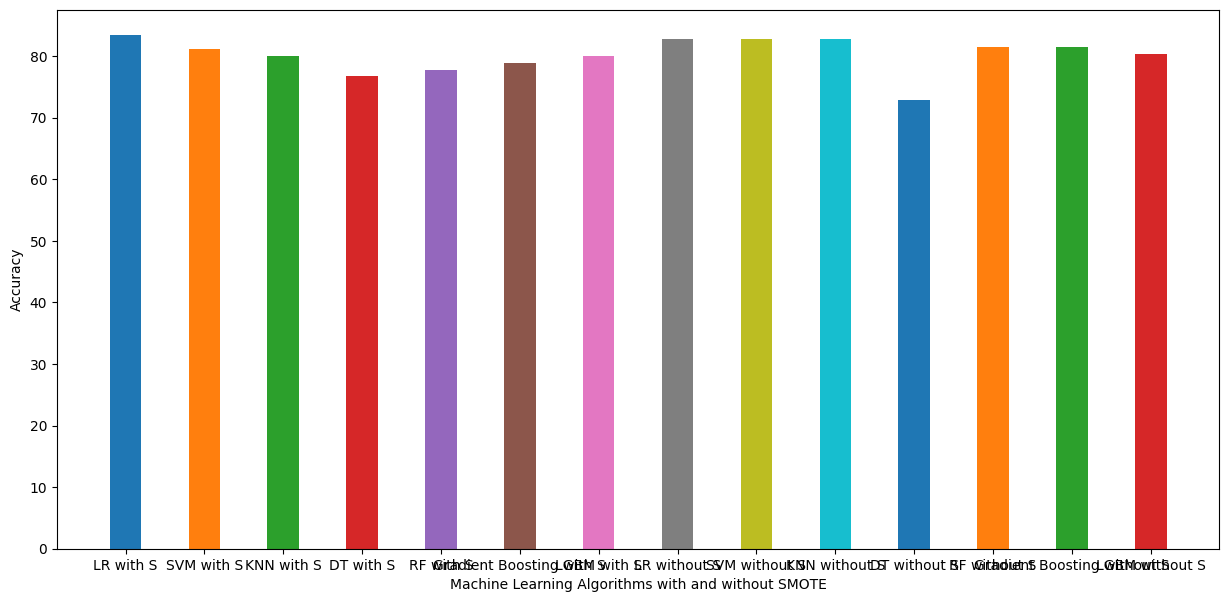

In [507]:
plt.figure(figsize=(15,7))
plt.bar("LR with S", logis_acc1 , width=0.4)
plt.bar("SVM with S", svm_acc1, width=0.4)
plt.bar("KNN with S",knn_acc1,width=0.4)
plt.bar("DT with S", dt_acc1 ,width=0.4)
plt.bar("RF with S", rf_acc1,width=0.4)
plt.bar("Gradient Boosting with S", gb_acc1,width=0.4)
plt.bar("LGBM with S",lgbm_acc1,width=0.4)
plt.bar("LR without S", logistic_acc, width=0.4)
plt.bar("SVM without S", svm_accu, width=0.4)
plt.bar("KNN without S",knn_accu,width=0.4)
plt.bar("DT without S", tree_accu,width=0.4)
plt.bar("RF without S", rf_accu,width=0.4)
plt.bar("Gradient Boosting without S", gbc_accu,width=0.4)
plt.bar("LGBM without S",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms with and without SMOTE')
plt.ylabel('Accuracy')